In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score ,root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings

In [3]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
x= data.iloc[: ,:-1]
y =data.iloc[: ,1]
x_train ,x_test ,y_train ,y_test =train_test_split(x,y,train_size=0.8 , random_state=10)



In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_poly_train ,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [9]:
y_poly_pred_train = poly_model.predict(x_poly_train)
y_poly_pred_test = poly_model.predict(x_poly_test)


In [10]:
x_range =np.linspace(x.min(),x.max() ,100).reshape(-1 ,1)
x_range_poly = poly.transform(x_range)
y_range_pred = poly_model.predict(x_range_poly)

g:\DEPI\Giz4_AIS2_ML\.env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


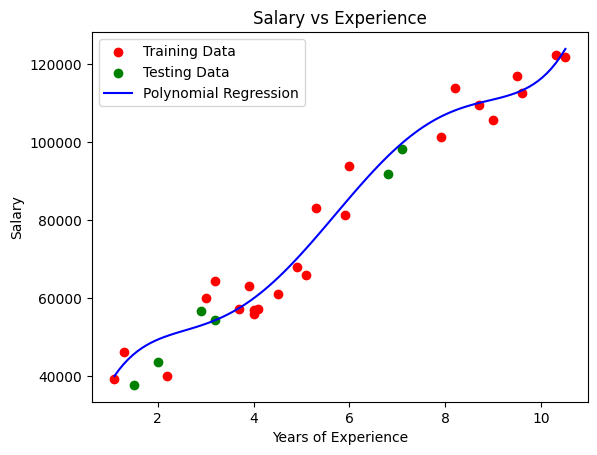

In [11]:
plt.scatter(x_train ,y_train ,color ='red' ,label ="Training Data")
plt.scatter(x_test ,y_test ,color ='green' ,label= "Testing Data")
plt.plot(x_range ,y_range_pred ,color ='blue' ,label ='Polynomial Regression')
plt.title("Salary vs Experience")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [12]:
mse = root_mean_squared_error(y_test , y_poly_pred_test)
print(mse)

4710.1081082767705


In [13]:
r2 =r2_score(y_test ,y_poly_pred_test)
print(r2)

0.9583808942515946


In [4]:
data = pd.read_csv('Social_Network_Ads.csv')

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
x = data.iloc[: ,[2,3]].values

y = data.iloc[: ,4].values

In [6]:
x_train ,x_test ,y_train ,y_test =train_test_split(x,y,train_size=0.8 , random_state=10)


In [8]:

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

0.8875
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        52
           1       0.85      0.82      0.84        28

    accuracy                           0.89        80
   macro avg       0.88      0.87      0.88        80
weighted avg       0.89      0.89      0.89        80



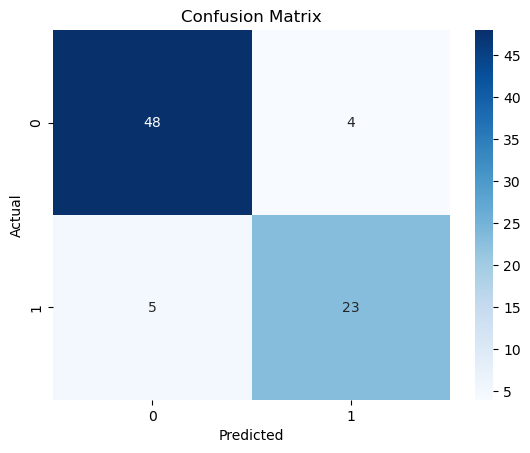

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix
logistic_model = LogisticRegression()
logistic_model.fit(x_train ,y_train)
y_logistic_pred = logistic_model.predict(x_test)
accuracy = accuracy_score(y_test ,y_logistic_pred)
print(accuracy)
print(classification_report(y_test ,y_logistic_pred))
cm = confusion_matrix(y_test ,y_logistic_pred)
sns.heatmap(cm ,annot =True ,fmt ='d' ,cmap ='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()